In [1]:
%%capture
%run 01_Data_Preparation.ipynb

## Gaussian Process Regressor

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, DotProduct

In [3]:
X_train = z.reshape(-1, 1)
y_train = mu

In [4]:
# input for predictions
X_pred = np.linspace(0.01, 8.5, 1000).reshape(-1,1)

In [5]:
# Instantiate a Gaussian Process model
kernel = ConstantKernel() + 1.0 * DotProduct() ** 0.1 + 1.0 * WhiteKernel()

gpr = GaussianProcessRegressor(
    kernel=kernel, 
    alpha=0.3, 
    normalize_y=True, 
    random_state=123, 
    n_restarts_optimizer=100
)

gpr.fit(X_train, y_train)

print(
    f"Kernel parameters before fit:\n{kernel} \n"
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f} \n"
    f"Score = {gpr.score(X_train,y_train)}"
)

Kernel parameters before fit:
1**2 + 1**2 * DotProduct(sigma_0=1) ** 0.1 + 1**2 * WhiteKernel(noise_level=1) 
Kernel parameters after fit: 
11.3**2 + 12.3**2 * DotProduct(sigma_0=1e-05) ** 0.1 + 0.00316**2 * WhiteKernel(noise_level=1e-05) 
Log-likelihood: -105.155 
Score = 0.9860713900623029


/home/shreeprasad/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__kernel__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/shreeprasad/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/shreeprasad/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


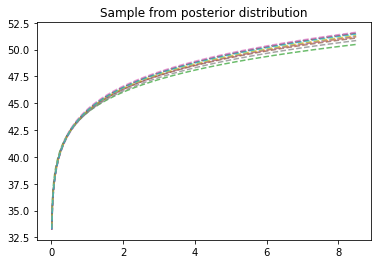

In [6]:
n_samples = 10
y_samples = gpr.sample_y(X_pred, n_samples)

for idx, single_prior in enumerate(y_samples.T):
    plt.plot(
            X_pred.reshape(-1),
            single_prior.reshape(-1),
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
    )
plt.title('Sample from posterior distribution')
plt.savefig(os.path.join(out_dir,'02_Sample_posterior_distibutions.png'))
plt.show()

In [7]:
y_pred, sigma = gpr.predict(X_pred, return_std=True)
y_pred = y_pred.reshape(-1)

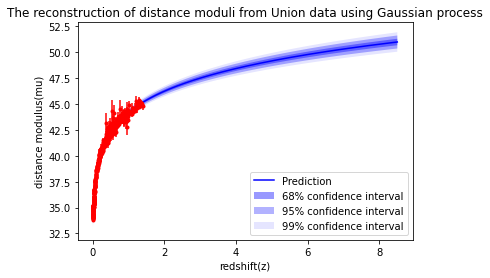

In [8]:
#plt.figure(figsize=(7,5))
#plt.plot(X_train, y_train, 'r.', markersize=3, label='Observations')
plt.plot(X_pred, y_pred, 'b-', label='Prediction',)
plt.errorbar(df_SNe['zCMB'], df_SNe['MU'],yerr=df_SNe['MUERR'], fmt='.',color='r')
plt.fill_between(X_pred[:,0], y_pred-1*sigma, y_pred+1*sigma,
         alpha=.4, fc='b', ec='None', label='68% confidence interval')
plt.fill_between(X_pred[:,0], y_pred-2*sigma, y_pred+2*sigma,
         alpha=.3, fc='b', ec='None', label='95% confidence interval')
plt.fill_between(X_pred[:,0], y_pred-3*sigma, y_pred+3*sigma,
         alpha=.1, fc='b', ec='None', label='99% confidence interval')
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('The reconstruction of distance moduli from '+dataset+' data using Gaussian process')
plt.legend()

plt.savefig(os.path.join(out_dir,'03_Reconstruction_GP.png'))

plt.show()